In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_AE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2,4.0,4.0,3.0,2.0,7,8,2,9,11,7,7,1,8,5,6,NaN
1,4,7.0,5.0,5.0,5.0,5,9,6,4,8,7,9,2,9,7,10,NaN
2,7,NaN,NaN,NaN,NaN,8,8,5,10,11,2,8,2,5,5,10,NaN
3,4,NaN,NaN,NaN,NaN,7,7,13,1,7,6,8,3,8,0,8,NaN
4,6,7.0,8.0,5.0,4.0,7,6,3,7,10,7,9,3,8,3,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5,10.0,5.0,8.0,3.0,4,10,7,8,12,10,9,2,9,2,6,NaN
19996,4,NaN,NaN,NaN,NaN,7,8,2,10,12,6,8,1,9,6,8,NaN
19997,4,8.0,4.0,6.0,4.0,7,8,7,4,10,7,6,3,9,3,7,NaN
19998,4,11.0,4.0,8.0,3.0,0,2,4,6,1,0,7,0,8,0,8,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	4000
float64		column 3	4000
float64		column 4	4000
float64		column 5	4000
int64		column 6	0
int64		column 7	0
int64		column 8	0
int64		column 9	0
int64		column 10	0
int64		column 11	0
int64		column 12	0
int64		column 13	0
int64		column 14	0
int64		column 15	0
int64		column 16	0
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,20000.000000,16000.000000,16000.000000,16000.000000,16000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,0.0
mean,4.023550,6.985125,5.114000,5.335750,3.493063,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120,NaN
std,1.913212,3.270179,1.969485,2.233906,2.149271,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000,NaN


<AxesSubplot:>

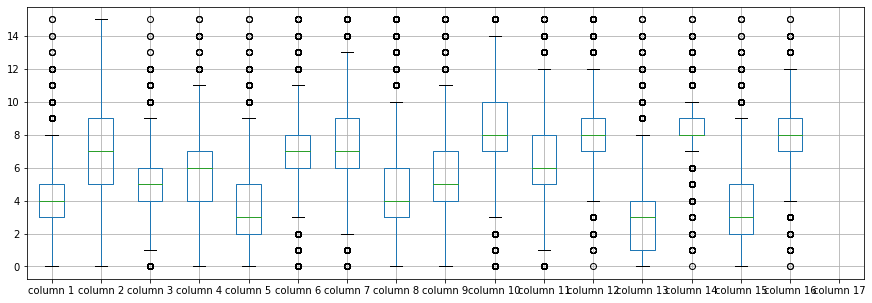

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.023550
column 2     6.985125
column 3     5.114000
column 4     5.335750
column 5     3.493063
column 6     6.897600
column 7     7.500450
column 8     4.628600
column 9     5.178650
column 10    8.282050
column 11    6.454000
column 12    7.929000
column 13    3.046100
column 14    8.338850
column 15    3.691750
column 16    7.801200
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.757042,0.849075,0.673495,0.615659,-0.032595,0.045545,0.014306,0.052086,0.148056,0.035464,-0.046333,0.489155,0.098180,0.273504,-0.105147,NaN
column 2,0.757042,1.000000,0.671044,0.824977,0.553650,0.048169,-0.055846,-0.031663,0.087898,0.157500,-0.078558,-0.027575,0.258373,-0.021960,0.216509,-0.050921,NaN
column 3,0.849075,0.671044,1.000000,0.660927,0.761212,0.063129,0.006122,-0.121937,0.058622,0.113690,-0.014078,-0.066044,0.537257,0.022790,0.239044,-0.126093,NaN
column 4,0.673495,0.824977,0.660927,1.000000,0.640070,0.048280,-0.035521,0.073408,0.045925,0.012062,-0.037226,0.006121,0.253066,0.003092,0.275231,-0.024836,NaN
column 5,0.615659,0.553650,0.761212,0.640070,1.000000,0.137384,-0.056920,-0.027093,-0.067204,-0.078736,-0.110950,-0.056982,0.612374,-0.014236,0.481116,-0.067841,NaN
column 6,-0.032595,0.048169,0.063129,0.048280,0.137384,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.341957,-0.032115,0.144325,-0.253339,0.127056,0.248816,NaN
column 7,0.045545,-0.055846,0.006122,-0.035521,-0.056920,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.600397,-0.271649,-0.036722,0.555060,-0.078008,-0.207900,NaN
column 8,0.014306,-0.031663,-0.121937,0.073408,-0.027093,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.042545,0.082020,0.142132,-0.084820,0.006546,0.182902,NaN
column 9,0.052086,0.087898,0.058622,0.045925,-0.067204,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.060116,0.119048,-0.384018,-0.052545,0.277540,-0.061335,NaN
column 10,0.148056,0.157500,0.113690,0.012062,-0.078736,0.085963,0.178318,-0.317780,0.132000,1.000000,0.057988,-0.106759,-0.175676,0.029419,-0.087019,-0.114223,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+45,17+45+45,17+45+45+45,17+45+45,17+45,17], vae_layer = False, seed = 450)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 63.05818717346192
Epoch: 1 , loss: 46.03178355407715
Epoch: 2 , loss: 43.277040989685055
Epoch: 3 , loss: 41.89865636901855
Epoch: 4 , loss: 41.12767369537354
Epoch: 5 , loss: 40.60575690460205
Epoch: 6 , loss: 40.37042780914307
Epoch: 7 , loss: 40.22343404541016
Epoch: 8 , loss: 40.005752987670895
Epoch: 9 , loss: 39.77200941925049
Epoch: 10 , loss: 39.831747578430175
Epoch: 11 , loss: 39.5535671875
Epoch: 12 , loss: 39.51224864196777
Epoch: 13 , loss: 39.437881256103516
Epoch: 14 , loss: 39.426813323974606
Epoch: 15 , loss: 39.238523136901854
Epoch: 16 , loss: 39.332145652771
Epoch: 17 , loss: 39.16029413604736
Epoch: 18 , loss: 39.201918116760254
Epoch: 19 , loss: 39.161212069702145
Epoch: 20 , loss: 39.065741120910644
Epoch: 21 , loss: 39.08651028594971
Epoch: 22 , loss: 38.96794952392578
Epoch: 23 , loss: 38.950885130310056
Epoch: 24 , loss: 38.926648886108396
Epoch: 25 , loss: 38.912802954101565


In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     4.511024
column 3     3.436863
column 4     3.572219
column 5     2.294583
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17    0.006094
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN
1,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN
2,0,-4.558267,-3.905177,-2.721438,-1.309051,0,0,0,0,0,0,0,0,0,0,0,NaN
3,0,-3.417603,-0.837268,-2.670578,-1.231029,0,0,0,0,0,0,0,0,0,0,0,NaN
4,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN
19996,0,-2.291152,-2.491309,-1.319273,-0.671691,0,0,0,0,0,0,0,0,0,0,0,NaN
19997,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN
19998,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

350.33091045511395

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.09382649594409827

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17     0.006308
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2,4.000000,4.000000,3.000000,2.000000,7,8,2,9,11,7,7,1,8,5,6,0.004915
1,4,7.000000,5.000000,5.000000,5.000000,5,9,6,4,8,7,9,2,9,7,10,0.008776
2,7,5.441733,4.094823,4.278562,2.690949,8,8,5,10,11,2,8,2,5,5,10,0.003165
3,4,5.582397,4.162732,4.329422,2.768971,7,7,13,1,7,6,8,3,8,0,8,0.007583
4,6,7.000000,8.000000,5.000000,4.000000,7,6,3,7,10,7,9,3,8,3,7,0.002278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5,10.000000,5.000000,8.000000,3.000000,4,10,7,8,12,10,9,2,9,2,6,0.007397
19996,4,4.708848,3.508691,3.680727,2.328309,7,8,2,10,12,6,8,1,9,6,8,0.002172
19997,4,8.000000,4.000000,6.000000,4.000000,7,8,7,4,10,7,6,3,9,3,7,0.009167
19998,4,11.000000,4.000000,8.000000,3.000000,0,2,4,6,1,0,7,0,8,0,8,-0.001110


In [21]:
imputations[-1].to_excel("Letter_AE_5(imp).xlsx", index=False, header=False)